In [2]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\revan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import seaborn as sns

In [4]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# #drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

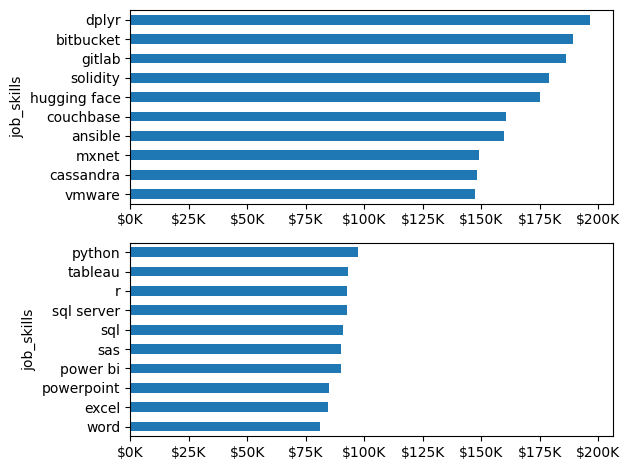

In [5]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

fig,ax = plt.subplots(2,1)

#Top 10 highest paid skills for Data analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0])
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos:f'${int(x/1000)}K'))
# ax[0].invert_xaxis()
ax[0].legend().set_visible(False)

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos:f'${int(x/1000)}K'))
# ax[0].invert_xaxis()
ax[1].set_xlim(ax[0].get_xlim())

plt.legend().set_visible(False)

fig.tight_layout()



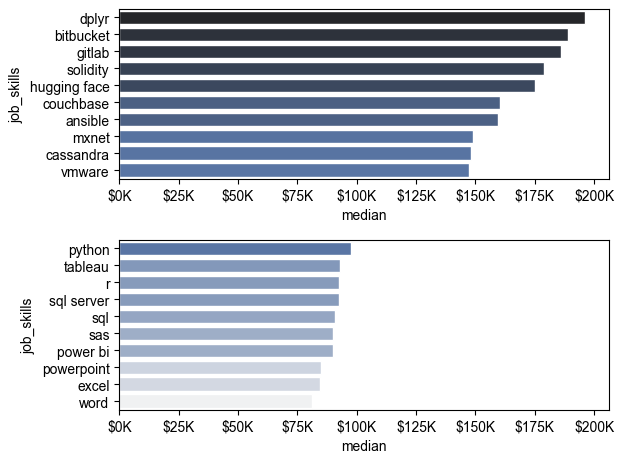

In [6]:
fig,ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

#top 10 hig paid jobs for data analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r' )

# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0])
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos:f'${int(x/1000)}K'))
# ax[0].invert_xaxis()
ax[0].legend().set_visible(False)

#top 10 in_demand skils for data analyst
sns.barplot(data=df_DA_skills,x = 'median',y = df_DA_skills.index, ax= ax[1], hue='median', palette='light:b')

# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos:f'${int(x/1000)}K'))
# ax[0].invert_xaxis()
ax[1].set_xlim(ax[0].get_xlim())

plt.legend().set_visible(False)

fig.tight_layout()
plt.show()

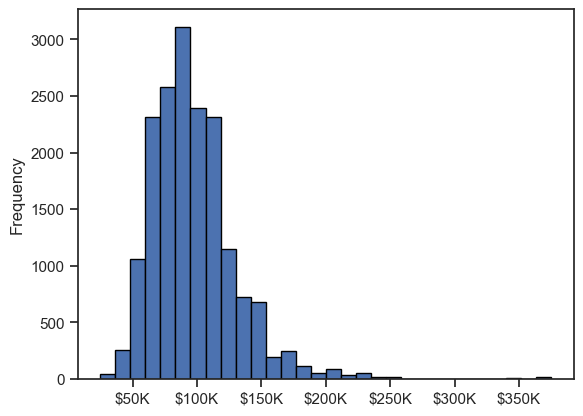

In [7]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

ax =plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

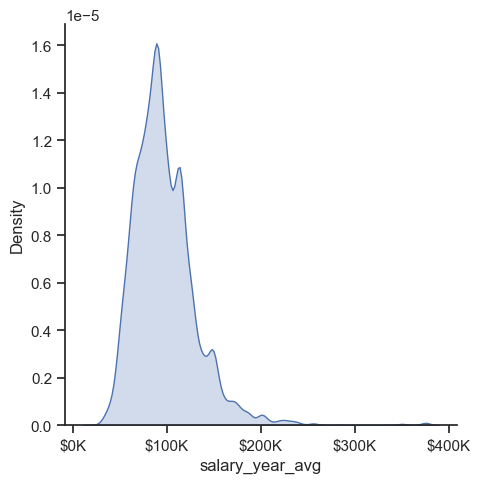

In [8]:
sns.set_theme(style='ticks')
sns.displot(df_DA_US['salary_year_avg'],kind = 'kde', fill =True)

ax =plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

C:\Users\revan\AppData\Local\Temp\ipykernel_17656\1296307305.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list,labels=job_titles, vert = False)


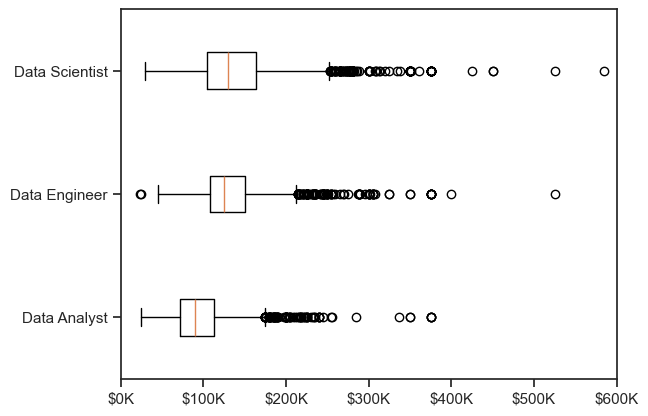

In [9]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

#filter the data to appropriate job_titles
#only get data analyst jobs
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list,labels=job_titles, vert = False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos:f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

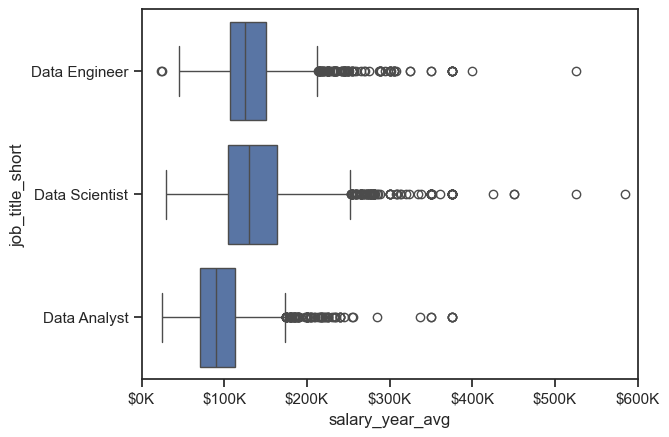

In [10]:
sns.boxplot(data=df_US,x='salary_year_avg', y='job_title_short')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos:f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()